In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Previous year

In [215]:
def calc_treasure(mult, hunt, perc):
    return mult * 7500 / (hunt + perc)

In [216]:
mult = np.array(
    [[24, 70, 41, 21, 60],
    [47, 82, 87, 80, 35],
    [73, 89, 100, 90, 17],
    [77, 83, 85, 79, 55],
    [12, 27, 52, 15, 30]]
)
hunt = np.array(
    [[2, 4, 3, 2, 4],
    [3, 5, 5, 5, 3],
    [4, 5, 8, 7, 2],
    [5, 5, 5, 5, 4],
    [2, 3, 4, 2, 3]]
)

In [217]:
x = 0.59
percs = np.array(
    [[1.52, 8.17, 1.89, x, 3.65],
    [3.02, 6.2, 9.84, 4.15, 1.15],
    [11.31, 10.76, 4.93, 3.43, 0.61],
    [4.56, 5.45, 6.55, 5.45, 2.45],
    [x, x, 1.94, x, x]]
)

In [218]:
treasures = []
for m, h, p in zip(mult.flatten(), hunt.flatten(), percs.flatten()):
    treasure = calc_treasure(m, h, p)
    treasures.append(treasure)

In [219]:
df = pd.DataFrame(data=np.array([mult.flatten(), hunt.flatten(), percs.flatten(), treasures]).T, columns=['mult', 'hunt', 'perc', 'tre'])
df = df.assign(tre_naive=lambda x: x['mult'] * 7500 / x['hunt'])

In [220]:
df_sorted = df.sort_values(by='tre_naive', ascending=False).reset_index(drop=True)

In [221]:
df_sorted

,mult,hunt,perc,tre,tre_naive
0,73.0,4.0,11.31,35760.940562,136875.000000
1,89.0,5.0,10.76,42354.060914,133500.000000
2,70.0,4.0,8.17,43138.866064,131250.000000
3,87.0,5.0,9.84,43969.002695,130500.000000
4,85.0,5.0,6.55,55194.805195,127500.000000
5,83.0,5.0,5.45,59569.377990,124500.000000
6,82.0,5.0,6.20,54910.714286,123000.000000
7,80.0,5.0,4.15,65573.770492,120000.000000
8,79.0,5.0,5.45,56698.564593,118500.000000
9,47.0,3.0,3.02,58554.817276,117500.000000


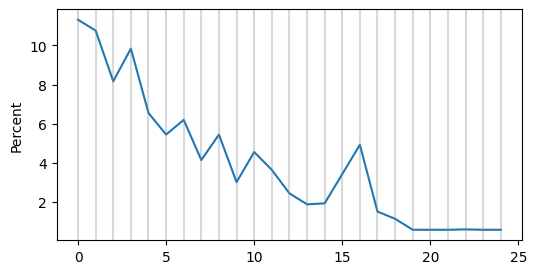

In [225]:
plt.figure(figsize=(6, 3))
plt.plot(df_sorted['perc'].to_numpy())
plt.ylabel('Percent')
for i in range(df_sorted.shape[0]):
    plt.axvline(i, c='gray', alpha=0.3)
plt.show()

In [173]:
(df_sorted.iloc[15:17]['perc'] - (df_sorted.iloc[14]['perc'] + df_sorted.iloc[17]['perc']) / 2) * 2.5

15    4.25
16    8.00
Name: perc, dtype: float64

In [174]:
df = pd.DataFrame(data=np.array([mult.flatten(), hunt.flatten(), percs.flatten(), treasures]).T, columns=['mult', 'hunt', 'perc', 'tre'])
df = df.assign(tre_naive=lambda x: x['mult'] * 7500 / (x['hunt'] + 4))
df_sorted = df.sort_values(by='tre_naive', ascending=False).reset_index(drop=True)

In [175]:
df_sorted

,mult,hunt,perc,tre,tre_naive
0,89.0,5.0,10.76,42354.060914,74166.666667
1,87.0,5.0,9.84,43969.002695,72500.000000
2,85.0,5.0,6.55,55194.805195,70833.333333
3,83.0,5.0,5.45,59569.377990,69166.666667
4,73.0,4.0,11.31,35760.940562,68437.500000
5,82.0,5.0,6.20,54910.714286,68333.333333
6,80.0,5.0,4.15,65573.770492,66666.666667
7,79.0,5.0,5.45,56698.564593,65833.333333
8,70.0,4.0,8.17,43138.866064,65625.000000
9,77.0,5.0,4.56,60407.949791,64166.666667


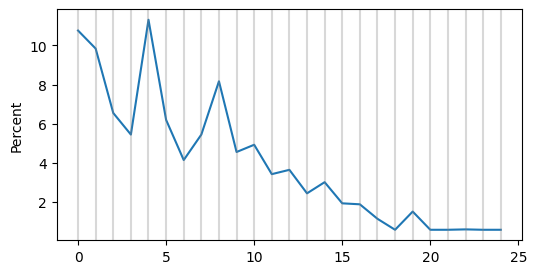

In [176]:
plt.figure(figsize=(6, 3))
plt.plot(df_sorted['perc'].to_numpy())
plt.ylabel('Percent')
for i in range(df_sorted.shape[0]):
    plt.axvline(i, c='gray', alpha=0.3)
plt.show()

# This year

- Your goal is to choose up to two containers.
- First one is free
- Second one has a fee of 50000 Sea Shells
- Each container is said to hold at least 10.000 SeaShells.

In [207]:
def calc_treasure(mult, hunt, perc):
    return mult * 10000 / (hunt + perc)

In [178]:
mult = np.array([10, 80, 37, 17, 90, 31, 50, 20, 73, 89])
hunt = np.array([1, 6, 3, 1, 10, 2, 4, 2, 4, 8])
fee = 50000

In [179]:
df = pd.DataFrame(data=np.array([mult.flatten(), hunt.flatten()]).T, columns=['mult', 'hunt'])

In [180]:
df = df.assign(tre_naive=lambda x: x['mult'] * 10000 / x['hunt'])

In [181]:
df_sorted = df.sort_values(by='tre_naive', ascending=False).reset_index(drop=True)

In [182]:
df_sorted

,mult,hunt,tre_naive
0,73,4,182500.000000
1,17,1,170000.000000
2,31,2,155000.000000
3,80,6,133333.333333
4,50,4,125000.000000
5,37,3,123333.333333
6,89,8,111250.000000
7,10,1,100000.000000
8,20,2,100000.000000
9,90,10,90000.000000


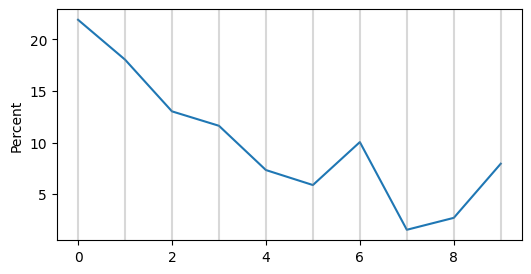

In [183]:
perc = np.linspace(1, 0.1, 10)** 2
perc = perc / perc.sum() * 100
perc += np.random.randint(0, 3, 10)
perc = perc / perc.sum() * 100
perc[-1] += 8
perc[6] += 6
perc[3] += 1
perc[7] -= 0.35
perc[8] += 0.35
perc = perc / perc.sum() * 100

plt.figure(figsize=(6, 3))
plt.plot(perc)
plt.ylabel('Percent')
for i in range(10):
    plt.axvline(i, c='gray', alpha=0.3)
plt.show()

In [184]:
(perc[5] + perc[7]) / 2

np.float64(3.69865602474298)

In [185]:
perc

array([21.91463061, 18.04853979, 13.02262172, 11.62340206,  7.32522472,
        5.8703537 , 10.03983091,  1.52695835,  2.68504586,  7.94339229])

In [186]:
perc[0], perc[6], perc[8], perc[9]

(np.float64(21.914630610282778),
 np.float64(10.039830909396123),
 np.float64(2.6850458589589015),
 np.float64(7.943392291218377))

In [187]:
df_sorted = df_sorted.assign(perc=perc)

In [188]:
df_sorted = df_sorted.assign(tre=lambda x: calc_treasure(x['mult'], x['hunt'], x['perc']))

In [189]:
df_sorted

,mult,hunt,tre_naive,perc,tre
0,73,4,182500.000000,21.914631,28169.415608
1,17,1,170000.000000,18.048540,8924.568597
2,31,2,155000.000000,13.022622,20635.545900
3,80,6,133333.333333,11.623402,45394.186512
4,50,4,125000.000000,7.325225,44149.234343
5,37,3,123333.333333,5.870354,41711.978199
6,89,8,111250.000000,10.039831,49335.273954
7,10,1,100000.000000,1.526958,39573.267949
8,20,2,100000.000000,2.685046,42689.016505
9,90,10,90000.000000,7.943392,50157.739707


In [190]:
df_final = df_sorted.sort_values(by='tre', ascending=False)
df_final

,mult,hunt,tre_naive,perc,tre
9,90,10,90000.000000,7.943392,50157.739707
6,89,8,111250.000000,10.039831,49335.273954
3,80,6,133333.333333,11.623402,45394.186512
4,50,4,125000.000000,7.325225,44149.234343
8,20,2,100000.000000,2.685046,42689.016505
5,37,3,123333.333333,5.870354,41711.978199
7,10,1,100000.000000,1.526958,39573.267949
0,73,4,182500.000000,21.914631,28169.415608
2,31,2,155000.000000,13.022622,20635.545900
1,17,1,170000.000000,18.048540,8924.568597


In [191]:
print(f'Selected: {int(df_final.iloc[0]['mult'])}, {int(df_final.iloc[1]['mult'])}')
print(f'Profit: {int(df_final.iloc[0]['tre'])}, {int(df_final.iloc[1]['tre']) - 50000}')

Selected: 90, 89
Profit: 50157, -665


# Sensitivity analysis

In [192]:
selected = []
df_sum = pd.Series(data=np.zeros(10), index=df_final['mult'])
for _ in range(1000):
    mult = np.array([10, 80, 37, 17, 90, 31, 50, 20, 73, 89])
    hunt = np.array([1, 6, 3, 1, 10, 2, 4, 2, 4, 8])
    fee = 50000
    
    df = pd.DataFrame(data=np.array([mult.flatten(), hunt.flatten()]).T, columns=['mult', 'hunt'])
    df = df.assign(tre_naive=lambda x: x['mult'] * 10000 / x['hunt'])
    df_sorted = df.sort_values(by='tre_naive', ascending=False).reset_index(drop=True)
    
    perc = np.linspace(1, 0.1, 10)** 2
    perc = perc / perc.sum() * 100
    perc += np.random.randint(0, 3, 10)
    perc = perc / perc.sum() * 100
    perc[-1] += 8
    perc[6] += 6
    perc[3] += 1
    perc[7] -= 0.35
    perc[8] += 0.35
    perc = perc / perc.sum() * 100
    
    # plt.figure(figsize=(6, 3))
    # plt.plot(perc)
    # plt.ylabel('Percent')
    # for i in range(10):
    # plt.axvline(i, c='gray', alpha=0.3)
    # plt.show()
    
    df_sorted = df_sorted.assign(perc=perc)
    df_sorted = df_sorted.assign(tre=lambda x: calc_treasure(x['mult'], x['hunt'], x['perc']))
    df_final = df_sorted.sort_values(by='tre', ascending=False)
    # print(df_final)

    df_sum = df_sum + df_final.set_index('mult', drop=True)['tre']
    selected.append(df_final.iloc[0]['mult'])
    selected.append(df_final.iloc[1]['mult'])

In [193]:
(df_sum / 1000).sort_values(ascending=False)

mult
20    52476.508594
89    51523.553775
90    50076.274442
80    45226.447273
37    41614.635266
50    41212.480983
10    31077.195101
73    28870.617540
31    19476.527787
17     9247.498241
dtype: float64

In [194]:
np.unique(selected, return_counts=True)

(array([20., 80., 89., 90.]), array([604,   6, 827, 563]))

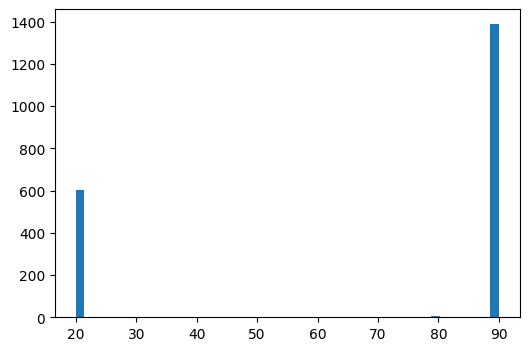

In [195]:
plt.figure(figsize=(6, 4))
plt.hist(selected, bins=50)
plt.show()

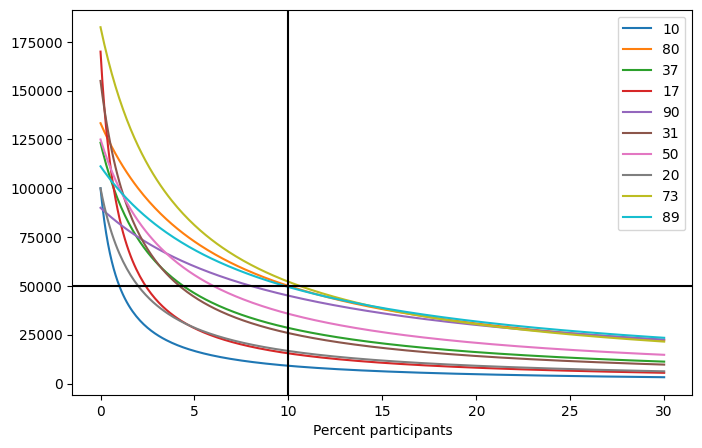

In [196]:
pct_range = np.arange(0, 30.1, 0.1)
treasure_list = []
for pct in pct_range:
    perc = np.ones(mult.shape) * pct
    treasure = calc_treasure(mult, hunt, perc)
    treasure_list.append(treasure.flatten())
cell_scores = []
for i in range(treasure_list[0].shape[0]):
    cell_scores.append([treasure[i] for treasure in treasure_list])
plt.figure(figsize=(8, 5))
for i, score in enumerate(cell_scores):
    plt.plot(pct_range, score, label=mult[i])
plt.axhline(50_000, c='k')
plt.axvline(10, c='k')
plt.xlabel('Percent participants')
plt.legend()
plt.show()

# Final results

In [197]:
df = pd.DataFrame(data=np.array([mult.flatten(), hunt.flatten()]).T, columns=['mult', 'hunt'])
df = df.assign(tre_naive=lambda x: x['mult'] * 10000 / x['hunt'])
df_sorted = df.sort_values(by='tre_naive', ascending=False).reset_index(drop=True)

In [198]:
df_sorted

,mult,hunt,tre_naive
0,73,4,182500.000000
1,17,1,170000.000000
2,31,2,155000.000000
3,80,6,133333.333333
4,50,4,125000.000000
5,37,3,123333.333333
6,89,8,111250.000000
7,10,1,100000.000000
8,20,2,100000.000000
9,90,10,90000.000000


In [199]:
perc = [24.06, 7.54, 6.99, 18.18, 8.52, 5.12, 15.18, 1, 1.61, 11.81]

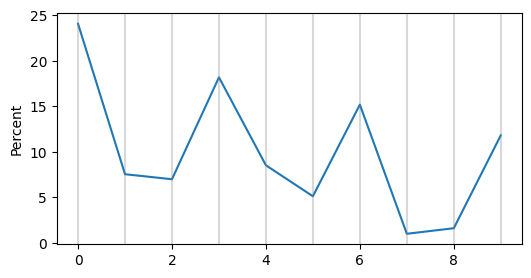

In [200]:
plt.figure(figsize=(6, 3))
plt.plot(perc)
plt.ylabel('Percent')
for i in range(10):
    plt.axvline(i, c='gray', alpha=0.3)
plt.show()

In [201]:
df_sorted = df_sorted.assign(perc=perc)

In [203]:
df_sorted['tre_naive'] = df_sorted['mult'] * 10000 / (df_sorted['hunt'] + 10)

In [204]:
df_sorted = df_sorted.sort_values(by='tre_naive', ascending=False).reset_index(drop=True)

In [213]:
df_sorted

,mult,hunt,tre_naive,perc,tre
0,73,4,52142.857143,24.06,26015.680684
1,80,6,50000.000000,18.18,33085.194376
2,89,8,49444.444444,15.18,38395.168248
3,90,10,45000.000000,11.81,41265.474553
4,50,4,35714.285714,8.52,39936.102236
5,37,3,28461.538462,5.12,45566.502463
6,31,2,25833.333333,6.99,34482.758621
7,20,2,16666.666667,1.61,55401.662050
8,17,1,15454.545455,7.54,19906.323185
9,10,1,9090.909091,1.00,50000.000000


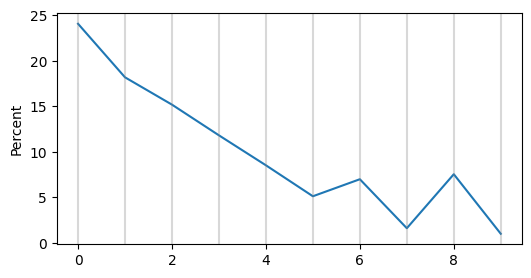

In [214]:
plt.figure(figsize=(6, 3))
plt.plot(df_sorted['perc'])
plt.ylabel('Percent')
for i in range(10):
    plt.axvline(i, c='gray', alpha=0.3)
plt.show()

-> The correct naive approach was equal percentages, not without considering percentages

In [209]:
df_sorted = df_sorted.assign(tre=lambda x: calc_treasure(x['mult'], x['hunt'], x['perc']))

In [211]:
df_sorted.sort_values('tre', ascending=False)

,mult,hunt,tre_naive,perc,tre
7,20,2,16666.666667,1.61,55401.662050
9,10,1,9090.909091,1.00,50000.000000
5,37,3,28461.538462,5.12,45566.502463
3,90,10,45000.000000,11.81,41265.474553
4,50,4,35714.285714,8.52,39936.102236
2,89,8,49444.444444,15.18,38395.168248
6,31,2,25833.333333,6.99,34482.758621
1,80,6,50000.000000,18.18,33085.194376
0,73,4,52142.857143,24.06,26015.680684
8,17,1,15454.545455,7.54,19906.323185
